<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Classification with Python</font></h1>


# Specialization: IBM AI Engineering Professional Certificate

## Course: Machine Learning with Python

## Assignment: Build a classifier to predict whether a loan case will be paid off or not.

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
import sklearn.tree as tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [3]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2022-06-15 15:49:55--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0s      

2022-06-15 15:49:56 (65.3 MB/s) - ‘loan_train.csv’ saved [23101/23101]



In [4]:
! ls -l

total 24
-rw-rw---- 1 wsuser wscommon 23101 Jun 10 07:09 loan_train.csv


### Load Data From CSV File


In [5]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [6]:
df.shape

(346, 10)

## Preprocess Data


In [7]:
def preprocess_data(df):
    df['due_date'] = pd.to_datetime(df['due_date'])
    df['effective_date'] = pd.to_datetime(df['effective_date'])
    df['dayofweek'] = df['effective_date'].dt.dayofweek
    df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

    df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
    
    Feature = df[['Principal','terms','age','Gender','weekend']]
    Feature = pd.concat([Feature, pd.get_dummies(df['education'])], axis=1)
    Feature.drop(['Master or Above'], axis = 1, inplace=True)
    X = Feature
    X = preprocessing.StandardScaler().fit(X).transform(X)

    y = df['loan_status'].values

    return X, y

Data Standardization give data zero mean and unit variance 

(technically should be done after train test split)


In [8]:
X, y = preprocess_data(df)
print(X.shape, y.shape)
print(X[:5])
print(y[:5])

(346, 8) (346,)
[[ 0.51578458  0.92071769  2.33152555 -0.42056004 -1.20577805 -0.38170062
   1.13639374 -0.86968108]
 [ 0.51578458  0.92071769  0.34170148  2.37778177 -1.20577805  2.61985426
  -0.87997669 -0.86968108]
 [ 0.51578458 -0.95911111 -0.65321055 -0.42056004 -1.20577805 -0.38170062
  -0.87997669  1.14984679]
 [ 0.51578458  0.92071769 -0.48739188  2.37778177  0.82934003 -0.38170062
  -0.87997669  1.14984679]
 [ 0.51578458  0.92071769 -0.3215732  -0.42056004  0.82934003 -0.38170062
  -0.87997669  1.14984679]]
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


In [9]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)
#df.groupby(['education'])['loan_status'].value_counts(normalize=False)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [10]:
df

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
341,394,394,COLLECTION,800,15,2016-09-11,2016-09-25,32,High School or Below,0,6,1
342,395,395,COLLECTION,1000,30,2016-09-11,2016-10-10,25,High School or Below,0,6,1
343,397,397,COLLECTION,800,15,2016-09-12,2016-09-26,39,college,0,0,0
344,398,398,COLLECTION,1000,30,2016-09-12,2016-11-10,28,college,0,0,0


### Convert to date time object


In [11]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [12]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


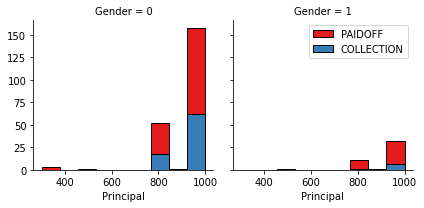

In [13]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

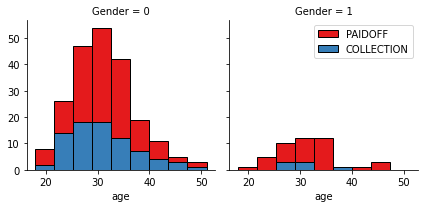

In [14]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

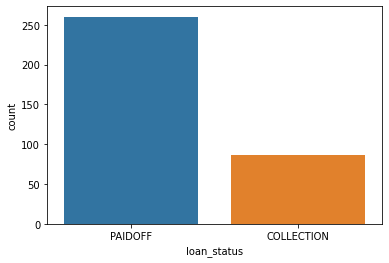

In [15]:
sns.countplot( x=df['loan_status'] )

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


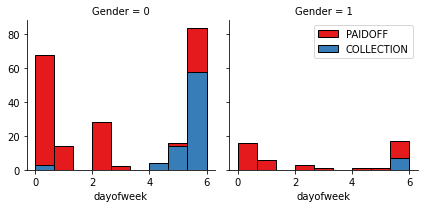

In [16]:
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)

g = sns.FacetGrid(df, 
                  col="Gender", 
                  hue="loan_status", 
                  palette="Set1", 
                  col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()

plt.show()

## Convert Categorical features to numerical values


Let's look at gender:


In [17]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)
#df.groupby(['Gender'])['loan_status'].value_counts(normalize=False)

Gender  loan_status
0       PAIDOFF        0.731293
        COLLECTION     0.268707
1       PAIDOFF        0.865385
        COLLECTION     0.134615
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


## One Hot Encoding

#### How about education?


# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model.

You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


In [9]:
rng = np.random.randint(500)
split_sz = 0.15
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=split_sz,
                                                    shuffle=True,
                                                    random_state=rng)
print(f"Random State={rng} => {(1-split_sz)*100}% train and {split_sz*100}% test")
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Random State=254 => 85.0% train and 15.0% test
Train set: (294, 8) (294,)
Test set: (52, 8) (52,)


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


Finding the best K:

In [10]:
def k_nearest_neighbor_clf(X_train, y_train, X_test, y_test, Ks=10):
    mean_acc = np.zeros((Ks))
    std_acc = np.zeros((Ks))

    classifiers = np.empty( Ks, dtype = object )

    for n in range( Ks ):    
        clf = KNeighborsClassifier( n_neighbors = (n+1) )
        clf.fit(X_train, y_train)
        yhat = clf.predict(X_test)
        
        mean_acc[n] = accuracy_score(y_test, yhat)
        std_acc[n] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
        classifiers[n] = clf

    bst_idx = mean_acc.argmax()+1
    print(mean_acc.max(), bst_idx)

    # Plot
    all_Ks = range(1,Ks+1)

    plt.figure(figsize=(15,8))
    plt.plot(all_Ks, mean_acc,'b', label='Test Accuracy')

    plt.fill_between(all_Ks, 
                    mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, 
                    alpha=0.10, 
                    label=r'+/- 1$\sigma$')

    plt.fill_between(all_Ks, 
                    mean_acc - 3 * std_acc, mean_acc + 3 * std_acc, 
                    alpha=0.08, 
                    color="green",
                    label=r'+/- 3$\sigma$')

    plt.plot(mean_acc.argmax()+1, mean_acc.max(), 'r*', 
            ms=5.2, 
            label=f"max accuracy = {mean_acc.max():.3f} @ K = {mean_acc.argmax()+1}")
    
    plt.legend(loc='upper left',ncol=4)
    plt.ylabel('Test Accuracy')
    plt.xlabel('K')

    plt.show()
    return classifiers[bst_idx]

0.8846153846153846 7


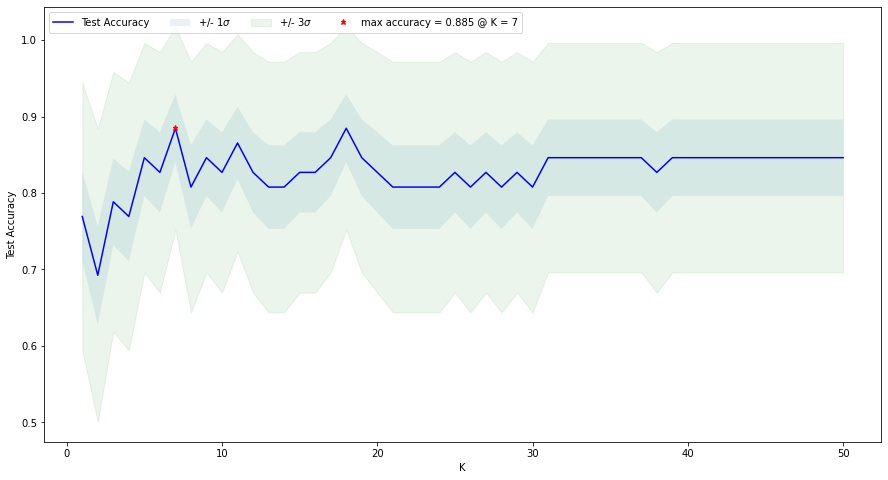

In [11]:
knn_clf = k_nearest_neighbor_clf(X_train, y_train, X_test, y_test, Ks=50)

# Decision Tree


In [12]:
def decision_tree_clf(X_train, y_train, X_test, y_test, max_d=4):
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=max_d)
    clf.fit(X_train, y_train)
    yhat = clf.predict(X_test)
    acc = accuracy_score(y_test, yhat)
    print(f">> Decision Tree Test Accuracy: {acc:.3f}")
    
    return clf

In [13]:
dt_clf = decision_tree_clf(X_train, y_train, X_test, y_test, max_d=5)

>> Decision Tree Test Accuracy: 0.827


# Support Vector Machine


In [14]:
def support_vector_machine_clf(X_train, y_train, X_test, y_test):
    kernels = ["linear", "poly", "rbf", "sigmoid"]
    accuracies = np.zeros((len(kernels)))
    classifiers = np.empty( (len(kernels) ), dtype = object )

    for krn_i, krn_v in enumerate(kernels):
        print(krn_i, krn_v)
        clf = svm.SVC(kernel=krn_v)
        clf.fit(X_train, y_train)
        yhat = clf.predict(X_test)
        acc = accuracy_score(y_test, yhat)
    
        accuracies[krn_i] = acc
        classifiers[krn_i] = clf

    bst_idx = accuracies.argmax()
    print(accuracies.max(), kernels[bst_idx], bst_idx)

    return classifiers[bst_idx]

In [15]:
svm_clf = support_vector_machine_clf(X_train, y_train, X_test, y_test)

0 linear
1 poly
2 rbf
3 sigmoid
0.8461538461538461 linear 0


# Logistic Regression


In [16]:
def logistic_regression_clf(X_train, y_train, X_test, y_test):
    solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    accuracies = np.zeros((len(solvers)))
    classifiers = np.empty( (len(solvers) ), dtype = object )

    for si, sv in enumerate(solvers):
        print(si, sv)
        clf = LogisticRegression(C=0.01, solver=sv)
        clf.fit(X_train, y_train)
        yhat = clf.predict(X_test)
        acc = accuracy_score(y_test, yhat)
        accuracies[si] = acc
        classifiers[si] = clf

    bst_idx = accuracies.argmax()
    print(accuracies.max(), solvers[bst_idx], bst_idx)

    return classifiers[bst_idx]

In [17]:
lr_clf = logistic_regression_clf(X_train, y_train, X_test, y_test)

0 newton-cg
1 lbfgs
2 liblinear
3 sag
4 saga
0.8461538461538461 newton-cg 0


In [18]:
#classifier_list = [knn_clf, dt_clf, svm_clf, lr_clf]
classifiers = {
    "KNN":                  knn_clf,
    "Decision Tree":        dt_clf,
    "SVM":                  svm_clf,
    "Logistic Regression":  lr_clf,
}

# Model Evaluation using Test set


In [19]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:


In [20]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2022-06-15 15:50:57--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2022-06-15 15:50:58 (41.2 MB/s) - ‘loan_test.csv’ saved [3642/3642]



In [21]:
! ls -l

total 28
-rw-rw---- 1 wsuser wscommon  3642 Jun  8  2018 loan_test.csv
-rw-rw---- 1 wsuser wscommon 23101 Jun 10 07:09 loan_train.csv


### Load Test set for evaluation


In [22]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [23]:
Xnew, ynew = preprocess_data(test_df)
print(Xnew.shape, ynew.shape)
print(Xnew[:5])
print(ynew[:5])

(54, 8) (54,)
[[ 0.49362588  0.92844966  3.05981865  1.97714211 -1.30384048  2.39791576
  -0.79772404 -0.86135677]
 [-3.56269116 -1.70427745  0.53336288 -0.50578054  0.76696499 -0.41702883
  -0.79772404 -0.86135677]
 [ 0.49362588  0.92844966  1.88080596  1.97714211  0.76696499 -0.41702883
   1.25356634 -0.86135677]
 [ 0.49362588  0.92844966 -0.98251057 -0.50578054  0.76696499 -0.41702883
  -0.79772404  1.16095912]
 [-0.66532184 -0.78854628 -0.47721942 -0.50578054  0.76696499  2.39791576
  -0.79772404 -0.86135677]]
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


In [24]:
algs = {}
for clf_name, clf in classifiers.items():
    #print(clf_name, clf)
    yhat = clf.predict(Xnew)
    jac_sc = jaccard_score( ynew, yhat, pos_label="PAIDOFF" )
    f1_sc = f1_score(ynew, yhat, average='weighted')
    log_loss_sc = None
    if clf_name == "Logistic Regression":
        yhat = clf.predict_proba(Xnew)
        log_loss_sc = log_loss(ynew, yhat)
    algs[clf_name] = [jac_sc, f1_sc, log_loss_sc ]
#print(algs)
algs_df = pd.DataFrame.from_dict(algs, orient='index')
algs_df.columns = ["Jaccard", "F1-score", "LogLoss"]
algs_df

,Jaccard,F1-score,LogLoss
KNN,0.673469,0.695921,NaN
Decision Tree,0.780000,0.758350,NaN
SVM,0.740741,0.630418,NaN
Logistic Regression,0.740741,0.630418,0.523834


# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
